<a href="https://colab.research.google.com/github/MarkMcCann487/NoiseMD/blob/main/TchavdarMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

# Lets first write a function to calculate energy and forces

We are going to define the potential as:

$$
V(\mathbf{x}) = 4 \sum_{i \ne j} \left[ \left( \frac{1}{r_{ij}^{12}}\right) - \left( \frac{1}{r_{ij}^{6}}\right) \right]
$$

where $r_{ij}$ is

$$
r_{ij} = \sqrt{ (x_i-x_j)^2 + (y_i-y_j)^2 }
$$

I want you to write a function in the cell below that calculates the energy due to this potential as well as the force.  The force is a vector with the same length as the number positions and with elements that are given by:

$$
F_{x_i} = - \frac{\partial V}{\partial x_i}
$$

I have written some code in the cell after the one below that you can use to test your potential function.  This cell compares the analytic forces that you can extract by doing the differentiation above with an estimate of the forces that I have calculated numerically.



In [ ]:
def potential(positions):
  natoms = positions.shape[0]
  #print( natoms )
  eng, forces = 0, np.zeros( positions.shape )
  for i in range(1,natoms):
    for j in range(i):
      r2 = (positions[i,0] - positions[j,0])**2+(positions[i,1] - positions[j,1])**2
      r6 = r2*r2*r2
      r12 = r6*r6
      V = 4*((1/r12) - (1/r6))

      eng += V
      forces[i][0] += 4*(positions[i,0] - positions[j,0])*((12/(r2*r12))-(6/(r2*r6)))
      forces[i][1] += 4*(positions[i,1] - positions[j,1])*((12/(r2*r12))-(6/(r2*r6)))
      forces[j][0] += -4*(positions[i,0] - positions[j,0])*((12/(r2*r12))-(6/(r2*r6)))
      forces[j][1] += -4*(positions[i,1] - positions[j,1])*((12/(r2*r12))-(6/(r2*r6)))
  #print(np.sum(forces))
  return eng, forces

(-11.48088267406684, array([[ 11.12236936,  -0.24930814],
       [ -2.80584445,   5.84908434],
       [ -0.05891713,   2.71327911],
       [  0.26538929,  -8.40368411],
       [  0.14712695,  -1.41968138],
       [-10.52754132,   4.19565912],
       [  1.85741731,  -2.68534894]]))


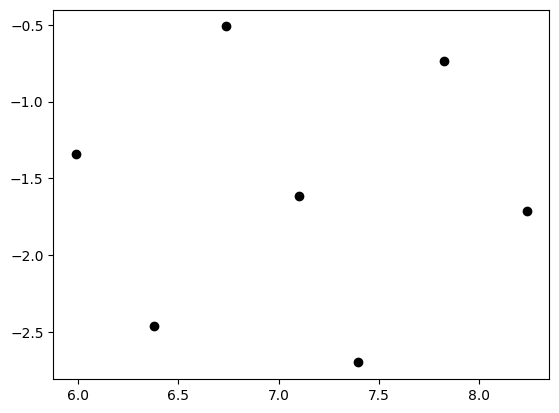

In [ ]:
# some initial positions
pos = np.array([[7.3933470660,-2.6986483924],
[7.8226765198, -0.7390907295],
[7.1014969839,-1.6164766614],
[8.2357184242,-1.7097824975],
[6.7372520842,-0.5111536183],
[6.3777119489,-2.4640437401],
[5.9900631495,-1.3385375043]])

plt.plot( pos[:,0], pos[:,1], "ko")
print(potential(pos))

In [ ]:
base_p, base_f = potential(pos)
for i in range(7) :
    for j in range(2) :
        pos[i][j] = pos[i][j] + 1E-8
        new_p, ff = potential(pos)
        numder = (new_p-base_p)/1E-8
        print( "FORCES", i, j, numder, base_f[i][j], np.abs(numder + base_f[i][j]) )
        pos[i][j] = pos[i][j] - 1E-8

FORCES 0 0 -11.12236809319711 11.122369359068962 1.265871851785505e-06
FORCES 0 1 0.24930848496751423 -0.24930814327494766 3.4169256657445857e-07
FORCES 1 0 2.8058449785817174 -2.805844453543254 5.250384633725957e-07
FORCES 1 1 -5.849083528630672 5.84908434398051 8.153498383123292e-07
FORCES 2 0 0.05891802601354357 -0.05891713447565183 8.915378917340178e-07
FORCES 2 1 -2.7132781355021507 2.713279114343201 9.788410504363299e-07
FORCES 3 0 -0.265388955256185 0.26538928592968214 3.3067349713977734e-07
FORCES 3 1 8.403685036739716 -8.403684111396052 9.253436648037905e-07
FORCES 4 0 -0.1471265775876418 0.14712694778027338 3.701926315768933e-07
FORCES 4 1 1.4196817943457063 -1.4196813754877735 4.188579327824016e-07
FORCES 5 0 10.52754257102606 -10.527541319013345 1.2520127157245042e-06
FORCES 5 1 -4.195658931394064 4.195659116802207 1.8540814306078346e-07
FORCES 6 0 -1.8574169757812342 1.857417314253334 3.384720996812973e-07
FORCES 6 1 2.6853490098233124 -2.685348944967144 6.485616843576736e

The following video may help you out with the differentiation:

(ignore the details of how to do this with ASE.  I am giving you this to help with learning to use the chain rule in calculating the derivatives.)

In [ ]:
#%%HTML
#<iframe width="560" height="315" src="https://www.youtube.com/embed/IMEJv4n7s-c?si=CuLVIYqZKrzU5hsz" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [ ]:
def kinetic(vlist):
  v2 = np.square(vlist)
  totv = np.sum(v2)
  ke = 0.5*totv
  return ke

Some questions:

(1) If two atoms interact through the Lennard Jones potential for what distance is the potential minimized?

(2) What is the depth of this minimum?

In [ ]:

def MD( nsteps, tstep, positions, temp, stride, friction ) :
  natoms = positions.shape[0]
  velocities = np.zeros( positions.shape )
  for i in range(natoms) :
    velocities[i,0] = np.sqrt(temp)*np.random.normal()
    velocities[i,1] = np.sqrt(temp)*np.random.normal()
 # From statistical mechanics how do we pick a random initial velocity that is consistent with a temperature of temp?
  Potent = []
  Kinet = []
  Total = []
  pe, forces = potential( positions )
  Potent.append(pe)
  ke = kinetic(velocities)
  Kinet.append(ke)
  Total.append(pe+ke)

  if friction > 0:
    print("NVT Ensemble")
    therm = 0
    therm1 = np.exp(-0.5*tstep*friction)
    therm2 = np.sqrt((temp*(1-np.exp(-tstep*friction)))/natoms)
    for step in range(nsteps) :
      #apply thermostat
      therm = therm + kinetic(velocities)
      for j in range(natoms):

        velocities[j,0] = velocities[j,0]*therm1 + therm2*np.random.normal()
        velocities[j,1] = velocities[j,1]*therm1 + therm2*np.random.normal()
      therm = therm - kinetic(velocities)

      for j in range(natoms):

        velocities[j,0] = velocities[j,0] + 0.5*forces[j,0]*tstep
        velocities[j,1] = velocities[j,1] + 0.5*forces[j,1]*tstep
        positions[j,0]  = positions[j,0] + velocities[j,0]*tstep
        positions[j,1]  = positions[j,1] + velocities[j,1]*tstep

      pe, forces = potential (positions)

      for j in range(natoms):
        velocities[j,0] = velocities[j,0] + 0.5*forces[j,0]*tstep
        velocities[j,1] = velocities[j,1] + 0.5*forces[j,1]*tstep

      #thermostat again
      therm = therm + kinetic(velocities)
      for j in range(natoms):

        velocities[j,0] = velocities[j,0]*therm1 + therm2*np.random.normal()
        velocities[j,1] = velocities[j,1]*therm1 + therm2*np.random.normal()
      therm = therm - kinetic(velocities)

      if step%stride:
        ke = kinetic(velocities)
        Kinet.append(ke)
        Potent.append(pe)
        Total.append(pe+ke)




  else:
    print("NVE Ensemble")
    for step in range(nsteps) :
      # Update velocity by a half time step
      for j in range(natoms):
        velocities[j,0] = velocities[j,0] + 0.5*forces[j,0]*tstep
        velocities[j,1] = velocities[j,1] + 0.5*forces[j,1]*tstep
      # Update position by a full time step
        positions[j,0]  = positions[j,0] + velocities[j,0]*tstep
        positions[j,1]  = positions[j,1] + velocities[j,1]*tstep
      # Calculate the new energy and forces
      pe, forces = potential (positions)


      # Update velocity by a half time step
      for j in range(natoms):
        velocities[j,0] = velocities[j,0] + 0.5*forces[j,0]*tstep
        velocities[j,1] = velocities[j,1] + 0.5*forces[j,1]*tstep



      if step%stride:
        ke = kinetic(velocities)
        Kinet.append(ke)
        Potent.append(pe)
        Total.append(pe+ke)

  return Kinet, Potent, Total


[32.16538262528626, 32.51178092845189, 32.26438016377884, 32.379300558260766, 32.40527256907719, 32.528615927827396, 32.85113736030593, 32.67583492857753, 32.33970892515444, 32.19622010124976, 32.41931117880561, 32.60016119229424, 33.00629893380434, 32.755673227288405, 32.824620399483265, 32.880596986791865, 32.63008394556299, 32.73979476623519, 32.43023061994686, 32.744737417991196, 33.25094556600113, 33.18376284537192, 33.10800610276579, 32.83611614276461, 32.865476808585015, 32.95172164176235, 33.14106840316103, 33.038937175711595, 33.211826560474165, 33.286380135277895, 33.34267161214592, 33.48849202272213, 33.88340513905246, 33.75553641927056, 33.80183410041265, 33.64896066435952, 33.589470633062156, 33.61150046364287, 33.55605075190563, 33.705248517581, 33.664771318261984, 33.5755333709625, 33.77245543742225, 33.59351802362454, 33.75486492433491, 33.478296077770864, 33.39008754785836, 33.76726332889089, 33.65730271228471, 33.289663437968194, 33.45746103839556, 33.42968897756884, 

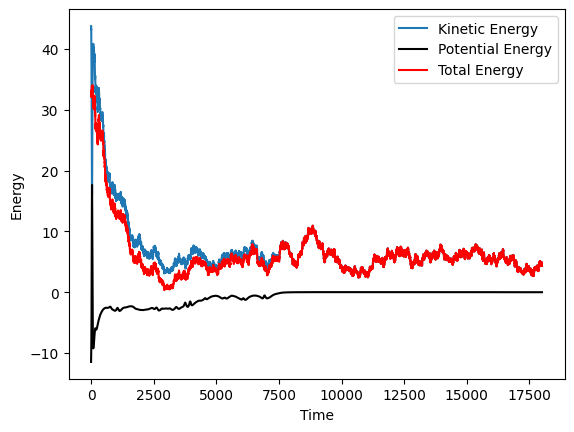

In [ ]:
pos = np.array([[7.3933470660,-2.6986483924],
[7.8226765198, -0.7390907295],
[7.1014969839,-1.6164766614],
[8.2357184242,-1.7097824975],
[6.7372520842,-0.5111536183],
[6.3777119489,-2.4640437401],
[5.9900631495,-1.3385375043]])


KE, PE, Total = MD(20000, 0.001, pos, 5, 10, 0.5)
print(Total)
plt.plot(KE, label='Kinetic Energy')
plt.plot(PE, 'k-', label='Potential Energy')
plt.plot(Total, 'r-',label='Total Energy')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

In [ ]:
#plt.plot( pos[:,0], pos[:,1], "ko")



1


[[0.         0.        ]
 [0.79370053 0.79370053]
 [0.         1.58740105]
 [0.79370053 2.38110158]
 [0.         3.1748021 ]
 [0.79370053 3.96850263]
 [0.         4.76220316]
 [0.79370053 5.55590368]
 [1.58740105 0.        ]
 [2.38110158 0.79370053]
 [1.58740105 1.58740105]
 [2.38110158 2.38110158]
 [1.58740105 3.1748021 ]
 [2.38110158 3.96850263]
 [1.58740105 4.76220316]
 [2.38110158 5.55590368]
 [3.1748021  0.        ]
 [3.96850263 0.79370053]
 [3.1748021  1.58740105]
 [3.96850263 2.38110158]
 [3.1748021  3.1748021 ]
 [3.96850263 3.96850263]
 [3.1748021  4.76220316]
 [3.96850263 5.55590368]]


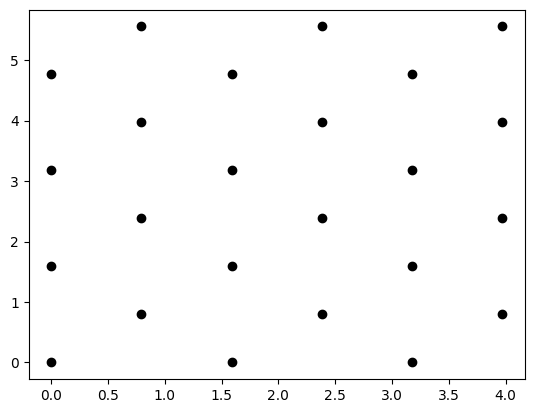

In [4]:


def gen_positions(nx, ny):
  a = (2**(2/3))
  natoms = 2*nx*ny
  positions = np.zeros([natoms,2])

  k=0
  for ix in range(nx) :
    for iy in range(ny) :
      positions[k][0] = (0+ix)*a
      positions[k][1] = (0+iy)*a
      positions[k+1][0] = (0.5+ix)*a
      positions[k+1][1] = (0.5+iy)*a
      k+=2

  return positions

pos = gen_positions(3,4)

print(pos)

plt.plot( pos[:,0], pos[:,1], "ko")



NVT Ensemble
[-10.431344967468618, -10.477711376803036, -10.545043093647699, -10.499625364404803, -10.483551934646641, -10.5132208245886, -10.553857208072294, -10.546213966948542, -10.59548628096471, -10.590665951635554, -10.632261904807013, -10.64397885694419, -10.650775510781337, -10.70772371176852, -10.755150108197938, -10.788826200158386, -10.844839435641571, -10.870612496762103, -10.890385899929854, -10.781327296254428, -10.867895950823026, -10.913194016108747, -10.914270761869801, -10.9633976515865, -11.020314079148424, -11.058523130637312, -11.095406140686393, -11.09434119518227, -11.13249283155498, -11.072703059432957, -11.098761674352517, -11.060916124058608, -11.051031905978864, -11.051165685182017, -11.066041854087626, -11.1321235460813, -11.11011682097391, -11.10465933006492, -11.14204173589981, -11.125471308960627, -11.14755770569515, -11.177326887941977, -11.210613883398295, -11.243539637133996, -11.308328335349824, -11.31175348081512, -11.42999813675905, -11.456208158097

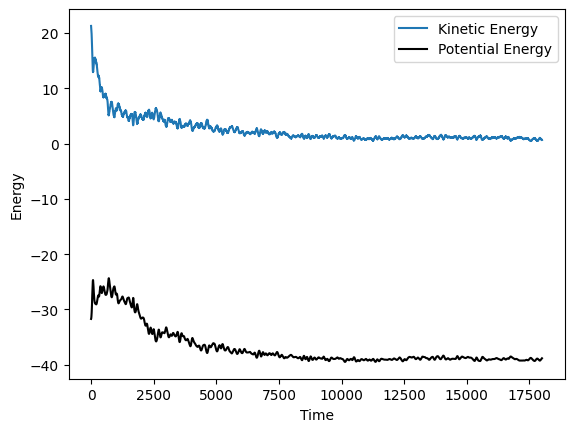

In [ ]:
KE, PE, Total = MD(20000, 0.001, pos, 1, 10, 0.5)
print(Total)
plt.plot(KE, label='Kinetic Energy')
plt.plot(PE, 'k-', label='Potential Energy')
#plt.plot(Total, 'r-',label='Total Energy')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()